# Лабораторна робота №6
## Студента групи МІТ-31 (підгрупа 2)
## Маніла Дмитра Олексійовича

# Завдання
1.  Виконати вирішення задачs класифікації для 3 класів з набору даних food101
2.  Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком (обчислені значення індексів вказані у даному документі у стовпчиках D:F) )
3.  Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab6.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
import zipfile

zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [6]:
import os
main_dir="101_food_classes_10_percent"

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("101_food_classes_10_percent/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [10]:
n = 12 #Variant

l = []
arr = (n - 1, n + 29, n + 59)
for i in range(len(class_names)):
    if i in arr:
        l.append(class_names[i])

print(l)

['caesar_salad', 'french_onion_soup', 'paella']


Image shape: (384, 512, 3)


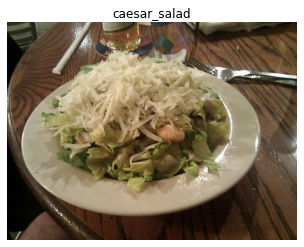

In [13]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="caesar_salad")

In [14]:
img

array([[[52, 57, 34],
        [50, 55, 33],
        [47, 51, 34],
        ...,
        [37, 30, 12],
        [37, 30, 12],
        [36, 29, 13]],

       [[47, 52, 29],
        [45, 50, 28],
        [43, 48, 28],
        ...,
        [31, 24,  6],
        [31, 24,  8],
        [30, 23,  7]],

       [[43, 48, 25],
        [41, 46, 24],
        [40, 45, 25],
        ...,
        [28, 21,  5],
        [29, 22,  6],
        [30, 23,  7]],

       ...,

       [[ 0,  2,  6],
        [ 0,  2,  6],
        [ 0,  2,  5],
        ...,
        [47, 34, 17],
        [52, 36, 20],
        [54, 37, 19]],

       [[ 0,  3,  7],
        [ 0,  4,  8],
        [ 0,  4,  7],
        ...,
        [43, 30, 14],
        [48, 32, 16],
        [50, 34, 18]],

       [[ 0,  4, 10],
        [ 0,  6,  9],
        [ 0,  5,  8],
        ...,
        [40, 27, 11],
        [47, 31, 15],
        [51, 35, 19]]], dtype=uint8)

In [15]:
img/255

array([[[0.20392157, 0.22352941, 0.13333333],
        [0.19607843, 0.21568627, 0.12941176],
        [0.18431373, 0.2       , 0.13333333],
        ...,
        [0.14509804, 0.11764706, 0.04705882],
        [0.14509804, 0.11764706, 0.04705882],
        [0.14117647, 0.11372549, 0.05098039]],

       [[0.18431373, 0.20392157, 0.11372549],
        [0.17647059, 0.19607843, 0.10980392],
        [0.16862745, 0.18823529, 0.10980392],
        ...,
        [0.12156863, 0.09411765, 0.02352941],
        [0.12156863, 0.09411765, 0.03137255],
        [0.11764706, 0.09019608, 0.02745098]],

       [[0.16862745, 0.18823529, 0.09803922],
        [0.16078431, 0.18039216, 0.09411765],
        [0.15686275, 0.17647059, 0.09803922],
        ...,
        [0.10980392, 0.08235294, 0.01960784],
        [0.11372549, 0.08627451, 0.02352941],
        [0.11764706, 0.09019608, 0.02745098]],

       ...,

       [[0.        , 0.00784314, 0.02352941],
        [0.        , 0.00784314, 0.02352941],
        [0.        , 0

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(12)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)



model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
8/8 [==============================] - 28s 4s/step - loss: 0.4796 - accuracy: 0.3333 - val_loss: 0.0698 - val_accuracy: 0.3333
Epoch 2/2
8/8 [==============================] - 26s 3s/step - loss: 0.0973 - accuracy: 0.3333 - val_loss: -0.1330 - val_accuracy: 0.3333


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

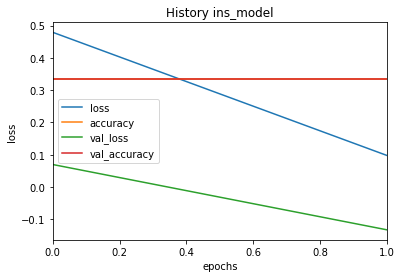

In [18]:
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

In [19]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

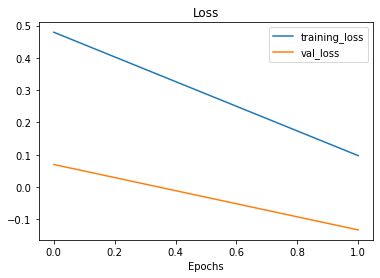

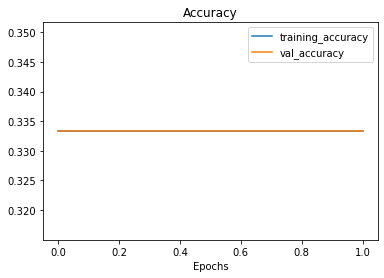

In [20]:
plot_loss_curves(history_1)

In [21]:
model_1.save('model1.h5')